### Multiple Choice and Short Answer Questions

#### Q1: You are designing an online game and have two network layer protocols to choose from:
TCP and UDP. The online game is a first person shooter game where real players fight each
other with guns in 5 versus 5 matches. You are in charge of two features:
1. an implementation of real time voice chat,
2. the network handlers that send player data from the end user’s clients to your dedicated,
central servers

Which protocols do you use for each and why?

#### Ans1:

Real time applications often need a minimum bitrate and can tolerate some data loss. In your example, of a real time voice chat, it is more important for the users to hear each other without delay even if a few milliseconds are inaudible. The network handlers that send player data to the server, should use TCP because reliability of the data there is vital.
1. I think voice chat would best operate with UDP. For the voice chat, it is more important for the users to hear each other without delay, even if a few milliseconds are inaudile. 
2. Since the reliability of data is most important,since players in a competitive online game need certainity and consistency regading their enviroments and competition, the network should use TCP.

#### Q2: Database dark arts: alchemy?
An advanced database module that many individuals use is called sqlalchemy , which you can
find here: https://www.sqlalchemy.org/ . This module does something very special known as
ORM - object-relational mapping. Do a little research and then, in your own words, explain what
you think the unique, core purpose of this module is and why this feature is its distinguishing
property. Is it better than pickling?

#### Ans2: 
According to SQLAlchemy's own documentation SQLAlchemy is a code library that automates the transfer of data stored in relational databases tables into objects.

For example, if we imagine this pandas dataframe as a sql database:


In [3]:
import pandas as pd

data = {'First Name':['Tom', 'Santa', 'Diamond'], 
        'Last Name':['Holland', 'Claus', 'Dallas Page'],  
        'Age':[20, 700, 62]
       }

df = pd.DataFrame(data)
df

,First Name,Last Name,Age
0,Tom,Holland,20
1,Santa,Claus,700
2,Diamond,Dallas Page,62


SQLAlchemy combines the paradigm above with Python's class structure such as the example below:

In [4]:
class Person:
    first_name = 'Tom'
    last_name = 'Holland'
    age = 20
#... etc.

fullstackpython.com reviewed SQLAlchemy in this way: "SQLAlchemy is a well-regarded Python ORM because it gets the abstraction level "just right" and seems to make complex database queries easier to write than the Django ORM in most cases."

ORMs provide a high-level abstraction upon a relational database that allows a developer to write Python code instead of SQL to create, read, update and delete data and schemas in their database. Developers can use the programming language they are comfortable with to work with a database instead of writing SQL statements or stored procedures.

In [ ]:
'SELECT * FROM USERS WHERE zip_code=94107;'
'users = Users.objects.filter(zip_code=94107)'

### Coding Questions

#### Coding 1: Networked Number Guessing Game

In [ ]:
from socket import *

print('Rules: \n\
\n\
-Guess a number from 1-100 until you get the correct number \n\
\n\
-If your guess is less than 1 or greater than 100, you will get "OUT OF BOUNDS!" \n\
\n\
-On your first turn, if your guess is within 10 of the number, you will get "WARM!", \n\
otherwise you will get "COLD!" \n\
\n\
-On subsequent guesses, if your guess is closer to the number than your previous guess, \n\
you will get "WARMER!", otherwise you will get "COLDER!" \n\
\n\
-When you correctly guess the number, you will get "CORRECT GUESS!" with the number of \n\
tries it took \n')

print ("Connecting to server...\n")

# Set up the socket as an Internet facing streaming socket
clientsocket = socket(AF_INET, SOCK_STREAM)
# Connect to the server on port 4000
try:
    clientsocket.connect(('localhost', 4000))
except ConnectionRefusedError:
    print ("The connection was refused.")
    exit(0)
print("connected!\n")
# Send the greeting message to the server, as specified by the requirements
message = "Hello\r\n"
clientsocket.send(message.encode('ascii'))
# Wait for a response, then print said response to the console
response = clientsocket.recv(1024)
print(response.decode('ascii'))

running = True

while running:
    # Ask for user to guess a number
    guess = input("Enter your guess: ")
    # Format the guess, ready to send to the server
    guessstring = "Guess: " + str(guess) + "\r\n"
    # Send the guess
    clientsocket.send(guessstring.encode('ascii'))

    # Wait for the response from the server
    response = clientsocket.recv(1024).decode('ascii')
    print (response)

    # Determine if the game is over
    if (response[0:11] == "You got it!"):
        running = False

clientsocket.close()

Rules: 
-Guess a number from 1-100 until you get the correct number 

-If your guess is less than 1 or greater than 100, you will get "OUT OF BOUNDS!" 

-On your first turn, if your guess is within 10 of the number, you will get "WARM!", 
otherwise you will get "COLD!" 

-On subsequent guesses, if your guess is closer to the number than your previous guess, 
you will get "WARMER!", otherwise you will get "COLDER!" 

-When you correctly guess the number, you will get "CORRECT GUESS!" with the number of 
tries it took 

Connecting to server...

connected!

Greetings



#### Coding 2: Requests

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script><!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/><link crossorigin="" href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/><link crossorigin="" href="https://images-na.ssl-images-amazon.com" rel="preconnect"/><link crossorigin="" href="https://m.media-amazon.com" rel="dns-prefetch"/><link crossorigin="" href="https://m.media-amazon.com" rel="preconnect"/><link crossorigin="" href="https://completion.amazon.com" rel="dns-prefetch"/><link crossorigin="" href="https://completion.amazon.com" rel="preconnect"/><script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(func
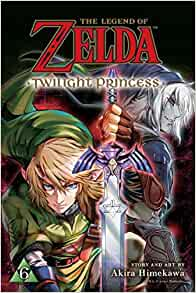

In [6]:
import requests
from bs4 import BeautifulSoup

headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.87 Safari/537.36'
}

url = 'https://www.amazon.com/gp/product/1974711633?pf_rd_p=ab873d20-a0ca-439b-ac45-cd78f07a84d8&pf_rd_r=2G0QCJ234E4F35QQ2A9F'

session = requests.Session()
session.headers.update(headers)

r = session.get(url=url)

# Use BeautifulSoup to parse your request response for specific info

soup = BeautifulSoup(r.content)
print(soup)

# Use Google Chrome DevTools to find the ID of the item you want to parse
#price = soup.find(id='priceblock').get_text()